A cohort is a group of users who share something in common, be it their sign-up date, first purchase month, birth date, acquisition channel, etc. Cohort analysis is the method by which these groups are tracked over time, helping you spot trends, understand repeat behaviors (purchases, engagement, amount spent, etc.), and monitor your customer and revenue retention.

In [137]:
import pandas as pd
import numpy as np

In [138]:
#import custoemr data
xls=pd.ExcelFile('relay-foods.xlsx')

#read the second sheet of the excel
udata=xls.parse(1)
udata

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.6700,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.6000,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.7100,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.3800,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.2800,FFYHD,2,2009-02-09
...,...,...,...,...,...,...,...
2886,3220,2010-03-08,393616,60.0155,AWNXG,15,2010-03-08
2887,3192,2010-03-07,394290,45.4300,AKGQT,12,2010-03-10
2888,3193,2010-03-07,394346,14.2100,2B47R,15,2010-03-08
2889,3207,2010-03-08,395039,34.6200,H6E23,4,2010-03-08


### Create a period column based on the OrderDate
#### Use monthly cohorts

In [139]:
# Extract year and month from the OrderDate column. strftim convert datetime to string 
udata['OrderPeriod'] = udata.OrderDate.apply(lambda g: g.strftime('%Y-%m')) #'%y-%m' will return 09 instead of 2009 as the year
udata.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


In [140]:
# check the data type of each column
udata.dtypes

OrderId                  int64
OrderDate       datetime64[ns]
UserId                   int64
TotalCharges           float64
CommonId                object
PupId                    int64
PickupDate      datetime64[ns]
OrderPeriod             object
dtype: object

### Determine the user's cohort group according to their first order

In [141]:
# Create a new column called CohortGroup, which is the year and month in which the user's first purchase occurred.
# first, set UserId as index
udata.set_index('UserId', inplace=True)

In [142]:
udata.head()

,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
UserId,,,,,,,
47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01
47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01
47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02
47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02
47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02


In [143]:
# find out the earliest order date of each user id
udata.groupby(level=0)['OrderDate'].min() # level=0 means groupby the first index

UserId
47       2009-01-11
95       2009-03-10
98       2009-01-29
112      2009-01-19
141      2009-11-13
            ...    
393616   2010-03-08
394290   2010-03-07
394346   2010-03-07
395039   2010-03-08
396551   2010-03-08
Name: OrderDate, Length: 757, dtype: datetime64[ns]

In [144]:
# generate cohort group based the the earliest order date for each user id
udata['CohortGroup']=udata.groupby(level=0)['OrderDate'].min().apply(lambda g: g.strftime('%Y-%m'))

In [145]:
udata.head()

,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
UserId,,,,,,,,
47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [146]:
# reset index and covert UserId to a column
udata.reset_index(inplace=True)
udata.head()

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


### Rollup data by CohortGroup & OrderPeriod

In [147]:
# group customers by CohortGroup and OrderPeriod, and then calcualte the total users, total orders and total charges for each group
cohorts = udata.groupby(['CohortGroup','OrderPeriod'],sort=0).apply( lambda g: pd.Series({\
    'TotalOrders': g.OrderId.nunique(),\
    'TotalUsers': g.UserId.nunique(),\
    'TotalCharges': g.TotalCharges.sum(),\
    }))
cohorts

TotalOrders  TotalUsers  TotalCharges
CohortGroup OrderPeriod                                       
2009-01     2009-01             30.0        22.0     1850.2550
            2009-02             25.0         8.0     1351.0650
            2009-03             26.0        10.0     1357.3600
            2009-04             28.0         9.0     1604.5000
            2009-05             26.0        10.0     1575.6250
...                              ...         ...           ...
2009-12     2010-02             28.0        18.0     1785.7853
2009-11     2010-02             64.0        29.0     3486.0959
            2010-03             17.0        13.0      961.3681
2009-12     2010-03              8.0         7.0      534.0929
2010-03     2010-03             26.0        24.0     1099.5471

[119 rows x 3 columns]

### Label the CohortPeriod for each CohortGroup

#### We want to look at how each cohort has behaved in the months following their first purchase, so we'll need to index each cohort to their first purchase month. For example, CohortPeriod = 1 will be the cohort's first month, CohortPeriod = 2 is their second, and so on.

#### This allows us to compare cohorts across various stages of their lifetime.

In [148]:
# define a function to calculate CohortPeriod
def cohort_period(udata):
    ##Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    udata['CohortPeriod'] = np.arange(len(udata)) + 1
    return udata


In [149]:
# Generate cohort period using the cohort_period function
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalOrders  TotalUsers  TotalCharges  CohortPeriod
CohortGroup OrderPeriod                                                     
2009-01     2009-01             30.0        22.0      1850.255             1
            2009-02             25.0         8.0      1351.065             2
            2009-03             26.0        10.0      1357.360             3
            2009-04             28.0         9.0      1604.500             4
            2009-05             26.0        10.0      1575.625             5

### Make sure we did all that right¶

Let's test data points from the original DataFrame with their corresponding values in the new cohorts DataFrame to make sure all our data transformations worked as expected. As long as none of these raise an exception, we're good.

In [150]:
x = udata[(udata.CohortGroup == '2009-01') & (udata.OrderPeriod == '2009-01')]
y = cohorts.loc[('2009-01', '2009-01')] # loc is index based

assert(x['UserId'].nunique() == y['TotalUsers'])
assert(x['TotalCharges'].sum().round(2) == y['TotalCharges'].round(2))
assert(x['OrderId'].nunique() == y['TotalOrders'])

x = udata[(udata.CohortGroup == '2009-01') & (udata.OrderPeriod == '2009-09')]
y = cohorts.loc[('2009-01', '2009-09')]

assert(x['UserId'].nunique() == y['TotalUsers'])
assert(x['TotalCharges'].sum().round(2) == y['TotalCharges'].round(2))
assert(x['OrderId'].nunique() == y['TotalOrders'])

x = udata[(udata.CohortGroup == '2009-05') & (udata.OrderPeriod == '2009-09')]
y = cohorts.loc[('2009-05', '2009-09')]

assert(x['UserId'].nunique() == y['TotalUsers'])
assert(x['TotalCharges'].sum().round(2) == y['TotalCharges'].round(2))
assert(x['OrderId'].nunique() == y['TotalOrders'])

### User Retention by Cohort Group

We want to look at the percentage change of each CohortGroup over time -- not the absolute change.

To do this, we'll first need to create a pandas Series containing each CohortGroup and its size.

In [151]:
# re-set index
cohorts.reset_index(inplace=True)

In [152]:
# set CohortGroup and CohortPeriod as indexes
cohorts.set_index(['CohortGroup','CohortPeriod'], inplace=True)

In [153]:
cohorts

OrderPeriod  TotalOrders  TotalUsers  TotalCharges
CohortGroup CohortPeriod                                                   
2009-01     1                2009-01         30.0        22.0     1850.2550
            2                2009-02         25.0         8.0     1351.0650
            3                2009-03         26.0        10.0     1357.3600
            4                2009-04         28.0         9.0     1604.5000
            5                2009-05         26.0        10.0     1575.6250
...                              ...          ...         ...           ...
2009-12     3                2010-02         28.0        18.0     1785.7853
2009-11     4                2010-02         64.0        29.0     3486.0959
            5                2010-03         17.0        13.0      961.3681
2009-12     4                2010-03          8.0         7.0      534.0929
2010-03     1                2010-03         26.0        24.0     1099.5471

[119 rows x 4 columns]

In [154]:
# create a Series holding the total size of each CohortGroup
cohort_group_size=cohorts['TotalUsers'].groupby(level=0).first() #first() compute first of group values and return Series or DataFrame
cohort_group_size.head()

CohortGroup
2009-01    22.0
2009-02    15.0
2009-03    13.0
2009-04    39.0
2009-05    50.0
Name: TotalUsers, dtype: float64

Now, we'll need to divide the TotalUsers values in cohorts by cohort_group_size. Since DataFrame operations are performed based on the indices of the objects, we'll use unstack on our cohorts DataFrame to create a matrix where each column represents a CohortGroup and each row is the CohortPeriod corresponding to that group.

To illustrate what unstack does, recall the first five TotalUsers values:

In [155]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2009-01      1               22.0
             2                8.0
             3               10.0
             4                9.0
             5               10.0
Name: TotalUsers, dtype: float64

And here's what they look like when we unstack the CohortGroup level from the index:

In [156]:
cohorts['TotalUsers'].unstack(0).head() # unstack(0) menas split CohortGroup to columns


CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
2,8.0,3.0,4.0,13.0,4.0,15.0,13.0,11.0,15.0,13.0,32.0,17.0,26.0,19.0,NaN
3,10.0,5.0,5.0,13.0,13.0,7.0,11.0,9.0,14.0,17.0,26.0,18.0,50.0,NaN,NaN
4,9.0,4.0,4.0,6.0,12.0,3.0,10.0,7.0,13.0,12.0,29.0,7.0,NaN,NaN,NaN
5,10.0,4.0,2.0,4.0,6.0,10.0,11.0,6.0,8.0,13.0,13.0,NaN,NaN,NaN,NaN


Now, we can utilize broadcasting to divide each column by the corresponding cohort_group_size.

The resulting DataFrame, user_retention, contains the percentage of users from the cohort purchasing within the given period. For instance, 38.4% of users in the 2009-03 purchased again in month 3 (which would be May 2009).

In [157]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.08,0.46875,0.26,0.354839,0.405405,0.240741,0.246154,0.261538,0.273684,0.19,NaN
3,0.454545,0.333333,0.384615,0.333333,0.26,0.21875,0.22,0.290323,0.378378,0.314815,0.200000,0.276923,0.526316,NaN,NaN
4,0.409091,0.266667,0.307692,0.153846,0.24,0.09375,0.20,0.225806,0.351351,0.222222,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.153846,0.102564,0.12,0.31250,0.22,0.193548,0.216216,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.102564,0.10,0.28125,0.14,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.333333,0.230769,0.179487,0.06,0.09375,0.20,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.153846,0.153846,0.10,0.18750,0.46,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.266667,0.230769,0.256410,0.10,0.15625,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finally, we can plot the cohorts over time in an effort to spot behavioral differences or similarities. Two common cohort charts are line graphs and heatmaps, both of which are shown below.

Notice that the first period of each cohort is 100% -- this is because our cohorts are based on each user's first purchase, meaning everyone in the cohort purchased in month 1.

In [158]:
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [162]:
user_retention[['2009-06','2009-07','2009-08']]

CohortGroup,2009-06,2009-07,2009-08
CohortPeriod,,,
1,1.00000,1.00,1.000000
2,0.46875,0.26,0.354839
3,0.21875,0.22,0.290323
4,0.09375,0.20,0.225806
5,0.31250,0.22,0.193548
6,0.28125,0.14,0.258065
7,0.09375,0.20,0.129032
8,0.18750,0.46,0.129032
9,0.15625,0.14,NaN


Text(0,0.5,'% of Cohort Purchasing')

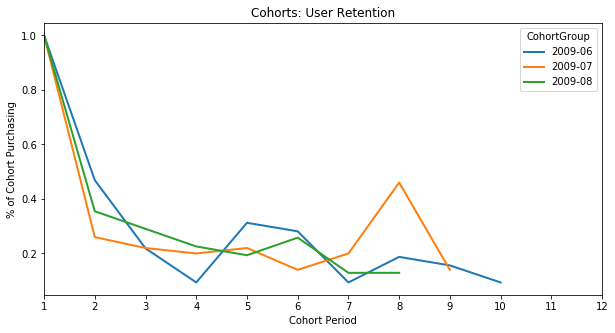

In [161]:
user_retention[['2009-06','2009-07','2009-08']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1,12.1,1))
plt.xlim(1,12)
plt.xlabel('Cohort Period')
plt.ylabel('% of Cohort Purchasing')

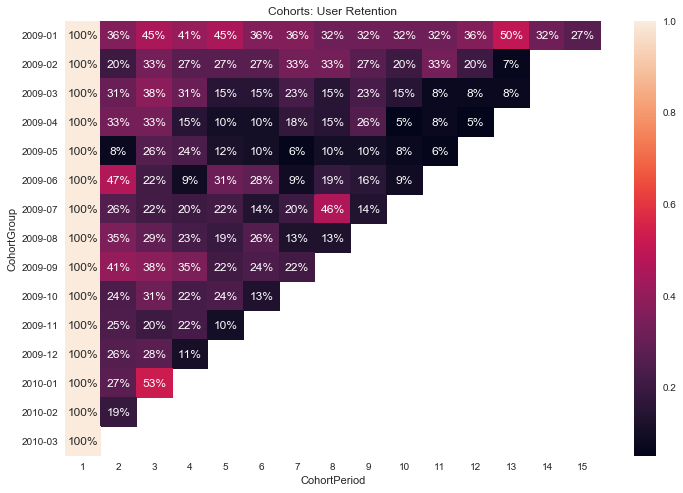

In [167]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# But Seaborn makes them easy for us.

import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

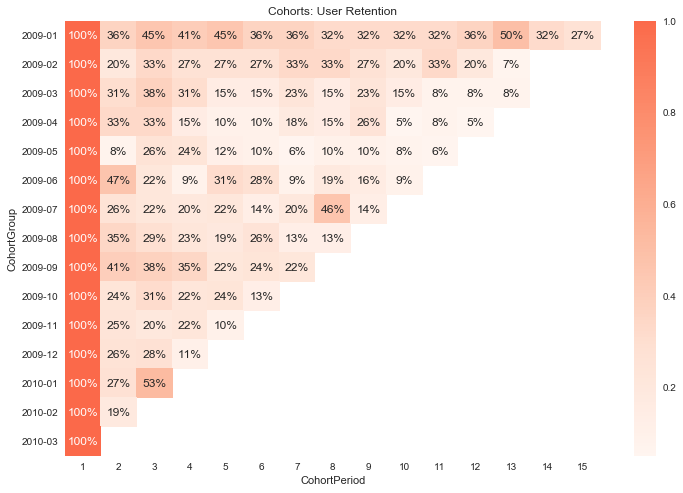

In [183]:
# How about we change the color? cmap is used to identify color palettes and center is used to identify the center of the heat
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%',cmap="Reds",center=1);

## Insights:

### 1) we can see from the above chart that fewer users tend to purchase as time goes on.

### 2) The 2009-01 cohort is the strongest. Then the next question is: what other attributes (besides first purchase month) do these users share which might be causing them to stick around? Is that something about the markeitng channels, campaigns or others?